# Problem(a)

Import dataset

In [3]:
# -*- coding: utf-8 -*-
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt

## Computer Tech

In [4]:
c1_graphics = ['comp.graphics']
c1_misc = ['comp.os.ms-windows.misc']
c1_pc = ['comp.sys.ibm.pc.hardware']
c1_mac = ['comp.sys.mac.hardware']
c1_graphics_train = fetch_20newsgroups(subset = 'train', categories = c1_graphics, shuffle=True, random_state=42)
c1_misc_train = fetch_20newsgroups(subset = 'train', categories = c1_misc, shuffle=True, random_state=42)
c1_pc_train = fetch_20newsgroups(subset = 'train', categories = c1_pc, shuffle=True, random_state=42)
c1_mac_train = fetch_20newsgroups(subset = 'train', categories = c1_mac, shuffle=True, random_state=42)

## Recreational Activity


In [5]:
c2_autos = ['rec.autos']
c2_motocycle = ['rec.motorcycles']
c2_baseball = ['rec.sport.baseball']
c2_hockey = ['rec.sport.hockey']
c2_autos_train = fetch_20newsgroups(subset = 'train', categories = c2_autos, shuffle=True, random_state=42)
c2_motocycle_train = fetch_20newsgroups(subset = 'train', categories = c2_motocycle, shuffle=True, random_state=42)
c2_baseball_train = fetch_20newsgroups(subset = 'train', categories = c2_baseball, shuffle=True, random_state=42)
c2_hockey_train = fetch_20newsgroups(subset = 'train', categories = c2_hockey, shuffle=True, random_state=42)

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


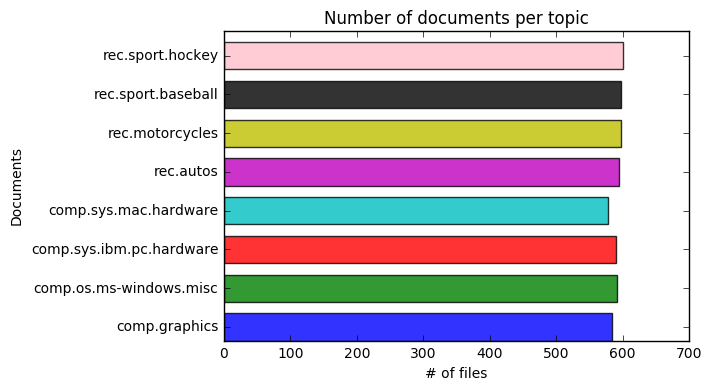

In [6]:
values = []
values = (len(c1_graphics_train.data), len(c1_misc_train.data),  len(c1_pc_train.data), len(c1_mac_train.data), len(c2_autos_train.data), len(c2_motocycle_train.data), len(c2_baseball_train.data), len(c2_hockey_train.data))
index = np.arange(8)
bar_width = 0.7
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink']
bars = plt.barh(index, values, bar_width,alpha = 0.8, color = color)
plt.xlabel('# of files')
plt.ylabel('Documents')
plt.title('Number of documents per topic')
plt.yticks(index + bar_width/2, ('comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey'))
plt.xlim(0,700)
plt.legend()
plt.show()

# Problem(b)

In [7]:
from sklearn.feature_extraction import text
import re
import nltk 
import string
# nltk.download()

In [8]:
stop_words = text.ENGLISH_STOP_WORDS

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenizer_fun(text):
    new_text = re.sub(r'[^A-Za-z]', " ", text)
    tokens =[word for sent in nltk.sent_tokenize(new_text) for word in nltk.word_tokenize(sent)]
    new_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            new_tokens.append(token)     
    stem = [stemmer.stem(t) for t in new_tokens]
    return stem

from sklearn.datasets import fetch_20newsgroups
all_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=('headers','footers','quotes'))

from sklearn.feature_extraction.text import TfidfVectorizer
TFxIDF = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
TFxIDF_data = TFxIDF.fit_transform(all_data.data)
count = TFxIDF_data.shape

print (count)

(18846, 72399)


In [9]:
print TFxIDF_data

  (0, 52902)	0.0830978323661
  (0, 19732)	0.0782058558488
  (0, 34880)	0.092844504626
  (0, 29073)	0.103660222972
  (0, 14491)	0.121979226031
  (0, 65419)	0.0548502807475
  (0, 29841)	0.115397414295
  (0, 48661)	0.160405516855
  (0, 4984)	0.097065404929
  (0, 55699)	0.0598990900044
  (0, 21550)	0.141524827565
  (0, 11598)	0.0801381263368
  (0, 33828)	0.0639533887412
  (0, 6695)	0.149246258053
  (0, 46821)	0.0991790629362
  (0, 66843)	0.0839667591186
  (0, 21172)	0.199408301472
  (0, 20291)	0.135415148972
  (0, 34890)	0.130150605062
  (0, 57732)	0.104108115326
  (0, 54354)	0.181564117965
  (0, 50958)	0.18039240989
  (0, 5440)	0.0645497791183
  (0, 67402)	0.0588931266997
  (0, 30728)	0.0455637444357
  :	:
  (18845, 14252)	0.0543966491976
  (18845, 22995)	0.102132669844
  (18845, 30248)	0.0675412727761
  (18845, 7255)	0.0729578290294
  (18845, 23669)	0.0614594234158
  (18845, 159)	0.056263091705
  (18845, 48071)	0.134206018683
  (18845, 8344)	0.0509283457917
  (18845, 6658)	0.070486395401

# Problem(c)

In [13]:
my_list=['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']

for category in my_list:
    categories = [category]
    sub_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, max_features=10, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}')
    sub_count = TFxIDF_sub.fit_transform(sub_data.data)
    #print (sub_count)
    print (TFxIDF_sub.vocabulary_.keys())

[u'drive', u'problem', u'disk', u'work', u'card', u'mb', u'ani', u'scsi', u'use', u'control']
[u'ani', u'drive', u'know', u'like', u'problem', u'work', u'use', u'mac', u'appl', u'monitor']
[u'new', u'offer', u'drive', u'ship', u'sale', u'sell', u'includ', u'price', u'pleas', u'use']
[u'peopl', u'say', u'believ', u'church', u'jesus', u'think', u'god', u'christian', u'sin', u'know']


# Problem(d)

In [14]:
from sklearn.decomposition import TruncatedSVD
X = TruncatedSVD(n_components=50, algorithm='arpack')
LSI = X.fit_transform(TFxIDF_data)

In [15]:
print LSI.shape

(18846L, 50L)


# Problem(e)

In [16]:
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.ibm.pc.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']

def data_fun(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
    return data  

def LSI_fun(train_or_test):
    if(train_or_test == 'train'):
        data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    if(train_or_test == 'test'):
        data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=('headers','footers','quotes'))
        TFxIDF_sub = TfidfVectorizer(analyzer='word',tokenizer=tokenizer_fun, stop_words=stop_words,token_pattern='[a-zA-Z]{2,}',)
        TFxIDF_sub_data = TFxIDF_sub.fit_transform(data.data)
        Y = TruncatedSVD(n_components=50, algorithm='arpack')
        sub_LSI = Y.fit_transform(TFxIDF_sub_data)
    return sub_LSI 

### Construct a training set

In [17]:
train_LSI = LSI_fun('train')
train_set = data_fun('train')
# separate into two groups(Computer Tech & Recreation)
train_target_group = [ int(x / 4) for x in train_set.target]

### Build a SVM classifier

In [18]:
from sklearn import svm
lin_svc = svm.LinearSVC()
lin_svc.fit(train_LSI, train_target_group)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Construct a testing set

In [19]:
test_LSI = LSI_fun('test')
test_set = data_fun('test')
test_target_group = [ int(x / 4) for x in test_set.target]
svm_predicted = lin_svc.predict(test_LSI)
print test_target_group[0:40]-svm_predicted[0:40]
y_score = lin_svc.fit(train_LSI, train_target_group).decision_function(test_LSI)

[ 0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0 -1  0  0 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]


In [20]:
print y_score[0:20]
print y_score.shape, svm_predicted.shape

[ 0.52663105 -2.33651589  0.5144043  -1.10996765 -4.19977757  1.59296215
  0.5180421  -3.18772289 -0.58821744  0.68414291  0.21751929  1.00822357
  3.27310343  0.48167631  0.35646819  1.51483087  0.77646553  0.90276301
 -1.16861116  1.71183756]
(2765L,) (2765L,)


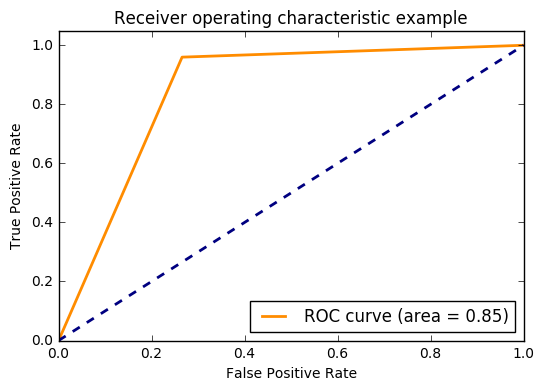

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, thresholds = roc_curve(test_target_group, svm_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[ 863  312]
 [  64 1526]]
Normalized confusion matrix
[[ 0.73  0.27]
 [ 0.04  0.96]]


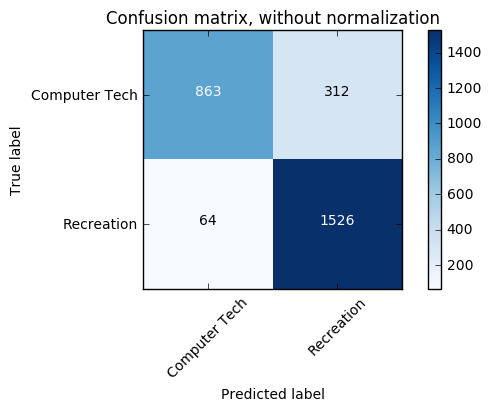

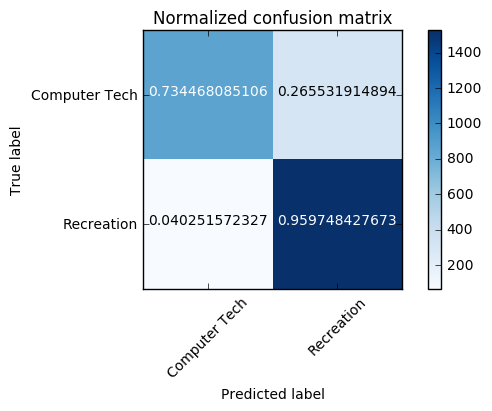

In [28]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, svm_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Linear SVM---Accuracy, Recall and Precision

In [112]:
from sklearn.metrics import accuracy_score
svm_accuracy = accuracy_score(test_target_group, svm_predicted)
print (svm_accuracy)

0.864014466546


In [123]:
from sklearn.metrics import recall_score
svm_recall_score = recall_score(test_target_group, svm_predicted)
print (svm_recall_score)

0.959748427673


In [113]:
from sklearn.metrics import precision_score
svm_precision_score = precision_score(test_target_group, svm_predicted)
print (svm_precision_score)

0.830250272035


# Problem(f)
soft margin SVM

In [29]:
print len(train_target_group)

4154


### Split the data into 5 fold

In [ ]:
from sklearn.cross_validation import KFold
kf = KFold(len(train_target_group), n_folds=5,shuffle=True,random_state=42)

In [101]:
print kf

sklearn.cross_validation.KFold(n=4154, n_folds=5, shuffle=True, random_state=42)


### Build 5*7 SVM classifiers

In [102]:
from sklearn import svm
#initialize a matrix with 7 rows(lamda) and 5 columns(5 validation)
matrix = [[0]*7 for i in range(5)]
i = 0
j = 0

for train_index, test_index in kf:
    X_train, X_test = train_LSI[train_index], train_LSI[test_index]
    for k in [-3, -2, -1, 0, 1, 2, 3]:
        X_train_target_group = [ int(x / 4) for x in train_set.target[train_index]]
        X_test_target_group = [ int(x / 4) for x in train_set.target[test_index]]
        
        soft_svm_clf = svm.LinearSVC(C=10**k)
        soft_svm_clf.fit(X_train, X_train_target_group)
        score = soft_svm_clf.score(X_test, X_test_target_group)
        matrix[i][j]=score
        j=j+1
    i=i+1
    j=0

In [105]:
import numpy as np
avg_value = np.array(matrix)
print avg_value.shape

(5L, 7L)


In [106]:
max = 0
max_index = 0
for i in range (7):
    mean = np.mean(avg_value[:,i:i+1])
    if max < mean:
        max = mean
        max_index = i
print max, max_index
penalty = [-3, -2, -1, 0, 1, 2, 3]
print ('The best penalty value is',10**penalty[max_index])   

0.943909065866 5
('The best penalty value is', 100)


In [110]:
from sklearn import svm
soft_svc = svm.LinearSVC(C=10**penalty[max_index])
soft_svc.fit(train_LSI, train_target_group)
soft_svc_predicted = soft_svc.predict(test_LSI)
score = soft_svc.score(test_LSI, test_target_group)
print (score)

0.844122965642


### Soft_SVM Confusion Matrix

Confusion matrix, without normalization
[[ 841  334]
 [  97 1493]]
Normalized confusion matrix
[[ 0.72  0.28]
 [ 0.06  0.94]]


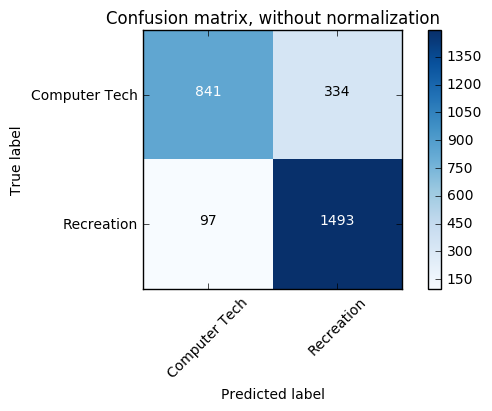

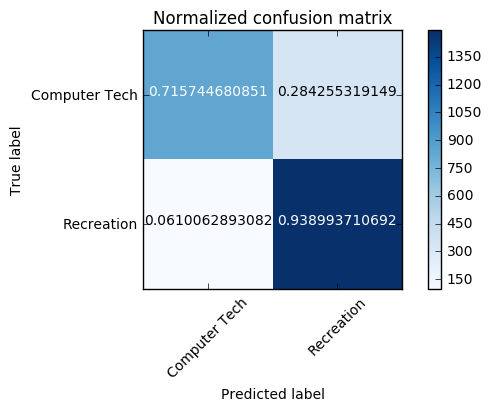

In [111]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['Computer Tech', 'Recreation']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target_group, soft_svc_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Soft Margin SVM---Accuracy, Recall and Precision

In [122]:
from sklearn.metrics import accuracy_score
soft_svc_accuracy = accuracy_score(test_target_group, soft_svc_predicted)
print (soft_svc_accuracy)

0.844122965642


In [121]:
from sklearn.metrics import precision_score
soft_svc_precision_score = precision_score(test_target_group, soft_svc_predicted)
print (soft_svc_precision_score)

0.817186644773


In [120]:
from sklearn.metrics import recall_score
soft_svc_recall_score = recall_score(test_target_group, soft_svc_predicted)
print (soft_svc_recall_score)

0.938993710692
